### Assignment 課題

Open the ipynb "http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html" .

Click the function PolynomialFeatures, then a new note will open. 

If you are interested in this function, you can go through the document. You don't have to do it.

But go to the bottom and find three example documents "Examples using sklearn.preprocessing.PolynomialFeatures". 

Play with the documents so that you are familiar with python codes and also with underfitting and overfitting.


Automatically created module for IPython interactive environment


C:\Users\kfb\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\kfb\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


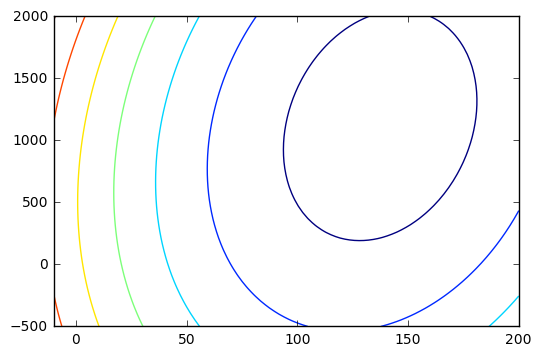

In [20]:
%matplotlib inline

print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

#coeff = regr.coef_
#icpt =regr.intercept_
#diab_y_pred = diabetes_X_test*coeff+icpt


#diabetes_y_test=np.reshape(diabetes_y_test,(20))
M=50
N = 100

variance_score=np.zeros((M,N))
msqerr=np.zeros((M,N))
coeff_list=np.linspace(-500,2000,M)
icpt_list=np.linspace(-10,200,N)
for i in range(0,M):
    for j in range(0,N):
#       print(i)
        diab_y_pred = diabetes_X_test*coeff_list[i]+icpt_list[j]    
        msqerr[i,j]=mean_squared_error(diabetes_y_test, diab_y_pred)
        variance_score[i,j]=r2_score(diabetes_y_test, diab_y_pred)
#print(msqerr)
#print(variance_score)
X1, X2 = np.meshgrid(icpt_list,coeff_list)
plt.contour(X1, X2, msqerr)

http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

### Assignment 課題

- How many coefficients should be determined?



1. When fitting with N-th order polynomiinals, the coefficients to be determined are N+1.

- Check the deviation of samples from the curves become smaller with the model complexity.

1. As is shown with codes below, mean squared error becomes smaller when increasing order of polynominals. Mse for [1st, 2nd, ... 6th] order polynominal fitting = [13.10753398 12.52600224 11.13913888  3.07077307  2.57245775  1.73199648].

Automatically created module for IPython interactive environment


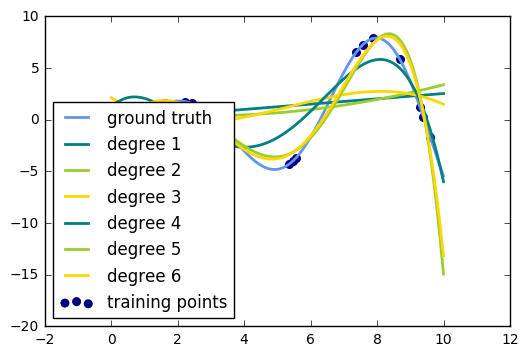

[13.10753398 12.52600224 11.13913888  3.07077307  2.57245775  1.73199648]


In [23]:

%matplotlib inline

print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


from sklearn.metrics import mean_squared_error, r2_score


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)


y_all = f(np.linspace(0, 10, 100)) # ground truth
msqerr = np.zeros([6])

# create matrix versions of these arrays
X = x[:, np.newaxis] #xを縦ベクトルにしている！！
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']*2
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

# enumerate関数を使ったforループ
# 引数にリストなどのイテラブルオブジェクトを指定する。
# インデックス番号, 要素の順に取得できる。

for count, degree in enumerate([1, 2, 3, 4, 5, 6]):
#    print(count) <- 0,1,2
#    print(degree) <- 3,4,5
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
    
    # calculate distance     
    msqerr[count]=mean_squared_error(y_all, y_plot) 
    
plt.legend(loc='lower left')

plt.show() 

#%whos
print(msqerr)